In [1]:
import numpy as np

In [ ]:
#1
c=np.array([-1,-2,3,3],dtype=float)
d=np.array([6,7,8,7,5],dtype=float)
e=np.array([2,2,2,-2],dtype=float)
A=np.diag(c,k=-1)+np.diag(d)+np.diag(e,k=1)
A

array([[ 6.,  2.,  0.,  0.,  0.],
       [-1.,  7.,  2.,  0.,  0.],
       [ 0., -2.,  8.,  2.,  0.],
       [ 0.,  0.,  3.,  7., -2.],
       [ 0.,  0.,  0.,  3.,  5.]])

In [ ]:
n=len(A)
for k in range(1,n): #두번째 행부터 끝까지
  lam=c[k-1]/d[k-1]
  d[k] = d[k]-lam*e[k-1]
  c[k-1]=lam

In [ ]:
L=np.eye(5)+np.diag(c,k=-1)
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.16666667,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.27272727,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.35106383,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.47635135,  1.        ]])

In [ ]:
U=np.diag(d)+np.diag(e,k=1)
U

array([[ 6.        ,  2.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  7.33333333,  2.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  8.54545455,  2.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  6.29787234, -2.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  5.9527027 ]])

In [ ]:
def find_x(b):
    y = np.zeros(n)
    x = np.zeros(n)
    #L@y=b forward
    y[0] = b[0]
    for k in range(1, n):
        y[k] = b[k] - c[k - 1] * y[k - 1]

    # U@x=y backward
    x[n - 1] = y[n - 1] / d[n - 1]
    for k in range(n - 2, -1, -1):
        x[k] = (y[k] - e[k] * x[k + 1]) / d[k]

    return x

In [ ]:
b0=np.eye(5)
b1=b0[0]
b2=b0[1]
b3=b0[2]
b4=b0[3]
b5=b0[4]

In [ ]:
find_x(b1)

array([ 0.15961975,  0.02114075,  0.00581725, -0.00212826,  0.00127696])

In [ ]:
find_x(b2)

array([-0.0422815 ,  0.12684449,  0.03490352, -0.01276958,  0.00766175])

In [ ]:
find_x(b3)

array([ 0.01163451, -0.03490352,  0.12797957, -0.04682179,  0.02809308])

In [ ]:
find_x(b4)

array([-0.00283768,  0.00851305, -0.03121453,  0.13337117, -0.0800227 ])

In [ ]:
find_x(b5)

array([-0.00113507,  0.00340522, -0.01248581,  0.05334847,  0.16799092])

In [ ]:
np.linalg.inv(A)

array([[ 0.15961975, -0.0422815 ,  0.01163451, -0.00283768, -0.00113507],
       [ 0.02114075,  0.12684449, -0.03490352,  0.00851305,  0.00340522],
       [ 0.00581725,  0.03490352,  0.12797957, -0.03121453, -0.01248581],
       [-0.00212826, -0.01276958, -0.04682179,  0.13337117,  0.05334847],
       [ 0.00127696,  0.00766175,  0.02809308, -0.0800227 ,  0.16799092]])

In [ ]:
#x_n은 A의 역행렬의 n번쨰 열과 같다

In [ ]:
#2.

In [14]:
#ludecomp를 사용하기위한 a,b만들기
def ready(n):
  A=4*np.eye(n)-np.eye(n,k=1)-np.eye(n,k=-1)
  b=5*np.ones(n)
  b[0]=9
  return A,b

In [55]:
#ludecomp3를 사용하기 윈한 c,d,e만들기
def make_cde(n):
  c=np.array([-1]*(n-1),dtype=float)
  d=np.array([4]*n,dtype=float)
  e=np.array([-1]*(n-1),dtype=float)
  return c,d,e

In [15]:
def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    return b

def LUdecomp(a):
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a

def LUsolve(a,b):
    n = len(a)
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

In [62]:
%time
n=8
b=5*np.ones(n)
b[0]=9
LUsolve3(*LUdecomp3(*make_cde(8)),b)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


array([2.90186213, 2.60744851, 2.52793193, 2.5042792 , 2.48918486,
       2.45246023, 2.32065606, 1.83016402])

In [72]:
%time
n=8
A,b=ready(n)
LUsolve(LUdecomp(A),b)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs


array([2.90186213, 2.60744851, 2.52793193, 2.5042792 , 2.48918486,
       2.45246023, 2.32065606, 1.83016402])

In [79]:
%time
n=10
b=5*np.ones(n)
b[0]=9
LUsolve3(*LUdecomp3(*make_cde(n)),b)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


array([2.90191936, 2.60767745, 2.52879042, 2.50748425, 2.50114659,
       2.4971021 , 2.48726181, 2.45194513, 2.3205187 , 1.83012968])

In [87]:
%time
A,b=ready(n)
LUsolve(LUdecomp(A),b)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


array([2.90191936, 2.60767745, 2.52879042, 2.50748425, 2.50114659,
       2.4971021 , 2.48726181, 2.45194513, 2.3205187 , 1.83012968])

In [88]:
%time
n=12
b=5*np.ones(n)
b[0]=9
LUsolve3(*LUdecomp3(*make_cde(12)),b)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


array([2.90192347, 2.60769388, 2.52885206, 2.50771437, 2.5020054 ,
       2.50030723, 2.49922351, 2.49658681, 2.48712374, 2.45190814,
       2.32050884, 1.83012721])

In [75]:
%time
A,b=ready(n)
LUsolve(LUdecomp(A),b)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


array([2.90192347, 2.60769388, 2.52885206, 2.50771437, 2.5020054 ,
       2.50030723, 2.49922351, 2.49658681, 2.48712374, 2.45190814,
       2.32050884, 1.83012721])

In [ ]:
#n이 커질수록 삼중대각행렬을 이용하여 정답을 찾을때 시간이 더 빨랐다.

In [ ]:
#3

In [ ]:
d=[2,4,4,2,3]
A=np.diag(d)-np.eye(5,k=1)-np.eye(5,k=-1)
A[2,4]=-2
A[4,2]=-2
A

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  4., -1.,  0.,  0.],
       [ 0., -1.,  4., -1., -2.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0., -2., -1.,  3.]])

In [ ]:
k=2.5
w=10
b=np.array([w/k]*5)

In [ ]:
b

array([4., 4., 4., 4., 4.])

In [ ]:
w=1
b=np.array([w/k]*5)
np.linalg.solve(A,b)

array([0.56, 0.72, 1.92, 2.24, 2.16])

In [ ]:
def ans(w):
  b=np.array([w/k]*5)
  return np.linalg.solve(A,b)


In [ ]:
x=np.zeros(5)
for i in range(1,6):
  x=np.vstack([x,ans(i)])
x=x[1:]
x

array([[ 0.56,  0.72,  1.92,  2.24,  2.16],
       [ 1.12,  1.44,  3.84,  4.48,  4.32],
       [ 1.68,  2.16,  5.76,  6.72,  6.48],
       [ 2.24,  2.88,  7.68,  8.96,  8.64],
       [ 2.8 ,  3.6 ,  9.6 , 11.2 , 10.8 ]])

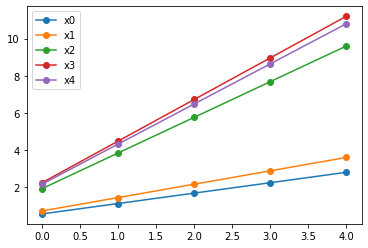

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
  xi=x.T
  plt.plot( xi[i],marker='o',label=f'x{i}')
  plt.legend()

In [ ]:
# W가 증가할 수록 x_n의 값들이 선형적으로 증가함을 확인 할 수 있다.